In [84]:
import pandas as pd
import seaborn as sb
import scipy as sp
import numpy as np
import json

VELA_mfp_distance = 118000000; #meters #probably wrong


In [86]:
#read xray attenuation constants, create equations
z = [22,23,24,25,26,27,28,29,30,40,41,42,48,50,74,82];
attenuations_df = {}

for key in z:
    colnames = ['E','mu_rho','mu_en_rho'];
    df = pd.read_csv('{}.csv'.format(key),names=colnames)
    #print(df.head(1))
    attenuations_df[key] = df

#https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z07.html
#energy, mass attenuation coefficient, μ/ρ, and the mass energy-absorption coefficient, μen/ρ
# E 	      	μ/ρ 	      	μ_{en}/ρ 
# (MeV)	(cm2/g) 	(cm2/g)


In [97]:
#read VELA sensor data
#6909: FR
#6911: Event 747
colnames = ['time','val'];
df_6909_YCA = pd.read_csv('6909_YCA_raw', names=colnames, delimiter='\t');
df_6909_YVA = pd.read_csv('6909_YVA_raw', names=colnames, delimiter='\t');
df_6911_YCA = pd.read_csv('6911_YCA_raw', names=colnames, delimiter='\t');
df_6911_YVA = pd.read_csv('6911_YVA_raw', names=colnames, delimiter='\t');

df_6911_YCA.insert(2,'event','6911 Event 747')
df_6909_YCA.insert(2,'event','6909 French Test')

df_YCA = pd.concat([df_6911_YCA,df_6909_YCA])


<AxesSubplot: xlabel='time', ylabel='val'>

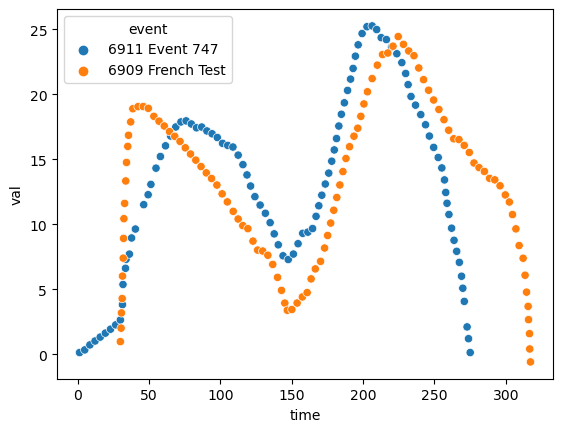

In [98]:
#print(df_YCA.head(5))

sb.scatterplot(data=df_YCA, x='time', y='val', hue = 'event')

[  0  46 100]
[  0  35  95 103]
        time       val             event
0   1.251551  0.145704  6911 French Test
1   4.873879  0.349251  6911 French Test
2   8.486408  0.733612  6911 French Test
3  12.103476  1.034205  6911 French Test
4  15.720545  1.334797  6911 French Test


<AxesSubplot: xlabel='time', ylabel='val'>

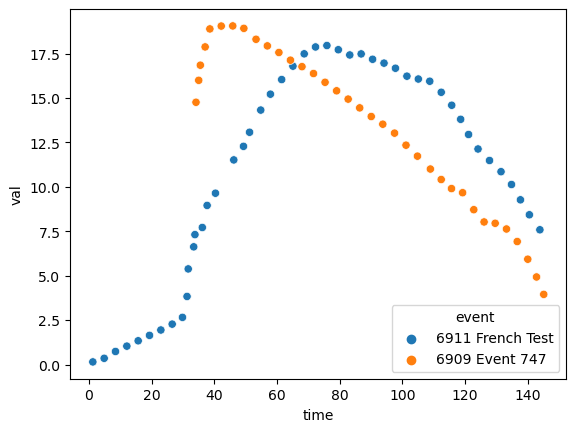

In [96]:
from scipy.signal import argrelextrema
import numpy as np

ilocs_min_6911 = argrelextrema(df_6911_YCA.val.values, np.less_equal, order = 2)[0]

print(ilocs_min_6911)

ilocs_min_6909 = argrelextrema(df_6909_YCA.val.values, np.less_equal, order = 2)[0]
print(ilocs_min_6909)

df_YCA = pd.concat([df_6911_YCA.iloc[ilocs_min_6911[0]:ilocs_min_6911[1]], df_6909_YCA.iloc[:ilocs_min_6909[1]]])
print(df_YCA.head(5))

sb.scatterplot(data=df_YCA, x='time', y='val', hue = 'event')

#df_YCA.insert(3), 'yield', 0)
#df_YCA['yield'] = df_YCA['val'].mul[-2.5]
